In [241]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold

In [242]:
df = pd.read_csv('TCGA_GBM_LGG_Mutations_clean.csv')
df

,Grade,Gender,Age_at_diagnosis,Race,IDH1,TP53,ATRX,PTEN,EGFR,CIC,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,1,1,51.30,2,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1,1,38.72,2,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,35.17,2,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,32.78,2,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,1,31.51,2,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852,0,0,77.89,2,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
853,0,1,85.18,2,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
854,0,0,77.49,2,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
855,0,1,63.33,2,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [243]:
# df.loc[:, "Gender":].columns.values.tolist()
all_inputs = df[df.loc[:, "Gender":].columns.values.tolist()].values

all_labels = df['Grade'].values

(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)

# Subset of the data
all_inputs[:5]

array([[ 1.  , 51.3 ,  2.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  1.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 1.  , 38.72,  2.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 1.  , 35.17,  2.  ,  1.  ,  1.  ,  1.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  , 32.78,  2.  ,  1.  ,  1.  ,  1.  ,  0.  ,  0.  ,  0.  ,
         1.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  1.  ,  0.  ],
       [ 1.  , 31.51,  2.  ,  1.  ,  1.  ,  1.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ]])

In [244]:
# Create the classifier
classifier = DecisionTreeClassifier()

# Train the classifier on the training set
classifier.fit(training_inputs, training_classes)

# Validate the classifier on the testing set using classification accuracy
accuracy = classifier.score(testing_inputs, testing_classes)
accuracy

0.8

(array([  3.,   3.,  38.,  98., 212., 244., 240., 127.,  32.,   3.]),
 array([0.70232558, 0.72      , 0.73767442, 0.75534884, 0.77302326,
        0.79069767, 0.80837209, 0.82604651, 0.84372093, 0.86139535,
        0.87906977]),
 <BarContainer object of 10 artists>)

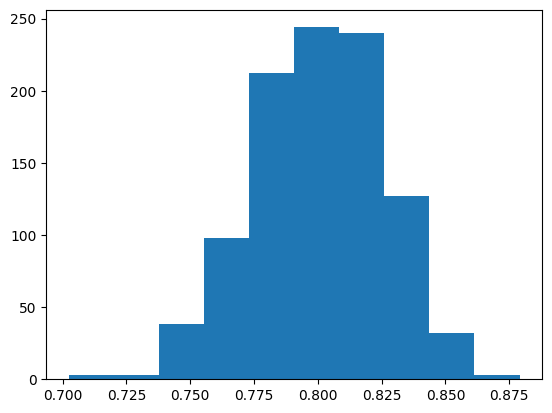

In [245]:
model_accuracies = []

for repetition in range(1000):
    (training_inputs,
     testing_inputs,
     training_classes,
     testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25)

    classifier = DecisionTreeClassifier()
    classifier.fit(training_inputs, training_classes)
    accuracy = classifier.score(testing_inputs, testing_classes)
    model_accuracies.append(accuracy)



plt.hist(model_accuracies)

Text(0.5, 1.0, 'Average score: 0.7958686730506156')

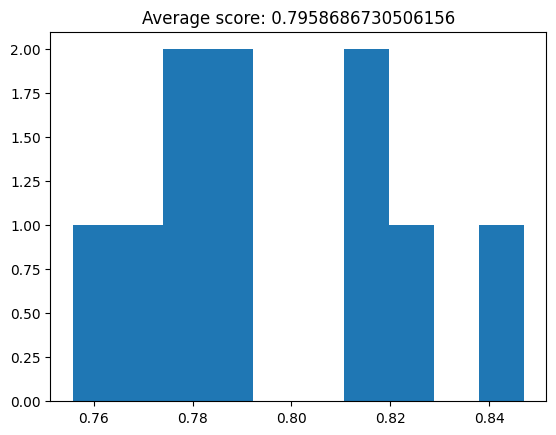

In [246]:
from sklearn.model_selection import cross_val_score

decision_tree_classifier = DecisionTreeClassifier()

# cross_val_score returns a list of the scores, which we can visualize
# to get a reasonable estimate of our classifier's performance
cv_scores = cross_val_score(decision_tree_classifier, all_inputs, all_labels, cv=10)
plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

Text(0.5, 1.0, 'Average score: 0.8448563611491109')

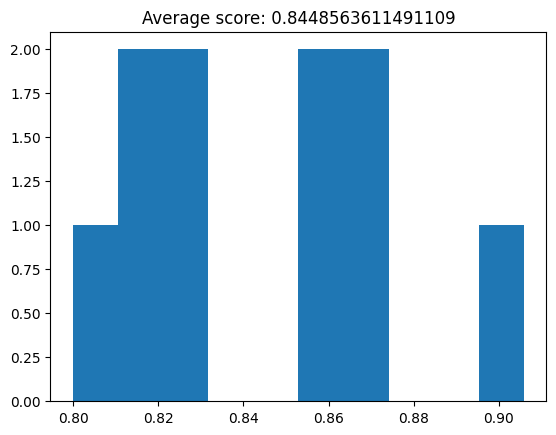

In [247]:
decision_tree_classifier = DecisionTreeClassifier(max_depth=10)

cv_scores = cross_val_score(decision_tree_classifier, all_inputs, all_labels, cv=10)
plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

In [248]:
from sklearn.model_selection import GridSearchCV

decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {'max_depth': [1, 2, 3, 4, 5],
                  'max_features': [1, 2, 3, 4]}

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(decision_tree_classifier, param_grid=parameter_grid, cv=cross_validation)

grid_search.fit(all_inputs, all_labels)

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.8285909712722297
Best parameters: {'max_depth': 5, 'max_features': 4}


Text(50.722222222222214, 0.5, 'max_depth')

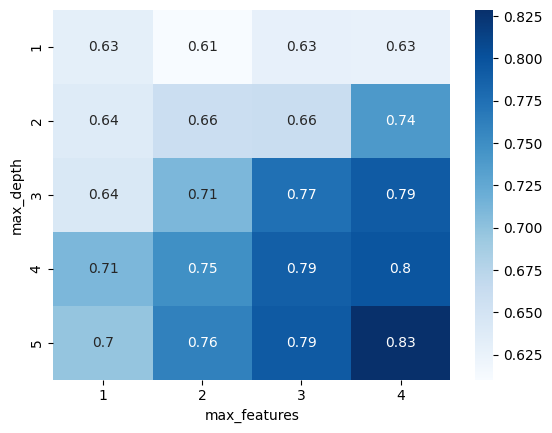

In [249]:
grid_visualization = grid_search.cv_results_['mean_test_score']
grid_visualization.shape = (5, 4)
sb.heatmap(grid_visualization, cmap='Blues', annot=True)
plt.xticks(np.arange(4) + 0.5, grid_search.param_grid['max_features'])
plt.yticks(np.arange(5) + 0.5, grid_search.param_grid['max_depth'])
plt.xlabel('max_features')
plt.ylabel('max_depth')

In [250]:
decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {'criterion': ['gini', 'entropy'],
                  'splitter': ['best', 'random'],
                  'max_depth': [1, 2, 3, 4, 5],
                  'max_features': [1, 2, 3, 4]}

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(decision_tree_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_inputs, all_labels)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.8435430916552666
Best parameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': 4, 'splitter': 'best'}


In [251]:
decision_tree_classifier = grid_search.best_estimator_
decision_tree_classifier

DecisionTreeClassifier(max_depth=5, max_features=4)

In [258]:
from sklearn.model_selection import GridSearchCV
from tensorflow import keras
from scikeras.wrappers import KerasClassifier

# Define the neural network architecture
def create_model():
    n_features = df.columns.size - 1
    num_classes = df['Grade'].unique().size

    # Possible activations are tanh, sigmoid(Better for binary class classification), relu, softmax
    model = keras.Sequential([
        keras.layers.Dense(150, activation='sigmoid', input_shape=(n_features,)),
        keras.layers.Dense(150, activation='sigmoid'),
        keras.layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer="adam",
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Create Model
model = KerasClassifier(model=create_model, verbose=0)

# Define the grid search parameters
# The batch size and number of epochs are hyperparameters that can be tuned

# Batch size defines the number of samples that will be propagated through the network
batch_size = [10, 20, 40, 80, 100]

# Epochs defines the number times that the learning algorithm will work through the entire training dataset
epochs = [10, 20, 60]
param_grid = dict(batch_size=batch_size, epochs=epochs)

# Perform grid search with cross-validation, using all available CPUs and tweaking the batch size and number of epochs
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=5)

# Test the model in the same way as the other algorithms
grid_result = grid.fit(training_inputs, training_classes)

# Summarize Results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


c:\Users\Cristiano\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best: 0.862875 using {'batch_size': 40, 'epochs': 60}
0.844295 (0.039921) with: {'batch_size': 10, 'epochs': 10}
0.841170 (0.015532) with: {'batch_size': 10, 'epochs': 20}
0.859738 (0.032946) with: {'batch_size': 10, 'epochs': 60}
0.842672 (0.034488) with: {'batch_size': 20, 'epochs': 10}
0.845809 (0.027389) with: {'batch_size': 20, 'epochs': 20}
0.856710 (0.028033) with: {'batch_size': 20, 'epochs': 60}
0.800606 (0.030646) with: {'batch_size': 40, 'epochs': 10}
0.839535 (0.029013) with: {'batch_size': 40, 'epochs': 20}
0.862875 (0.020973) with: {'batch_size': 40, 'epochs': 60}
0.770991 (0.015796) with: {'batch_size': 80, 'epochs': 10}
0.811555 (0.012955) with: {'batch_size': 80, 'epochs': 20}
0.856662 (0.018382) with: {'batch_size': 80, 'epochs': 60}
0.755438 (0.014680) with: {'batch_size': 100, 'epochs': 10}
0.799055 (0.015969) with: {'batch_size': 100, 'epochs': 20}
0.848837 (0.030071) with: {'batch_size': 100, 'epochs': 60}


Text(33.22222222222222, 0.5, 'Truth')

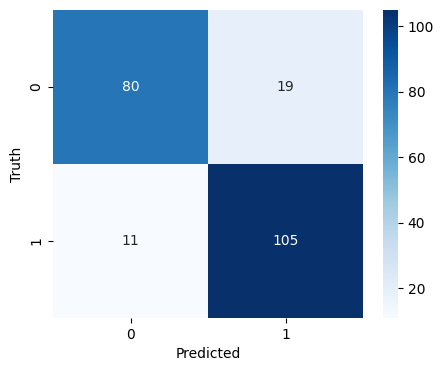

In [259]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

# Predict the values from the validation dataset
Y_pred = grid.best_estimator_.predict(testing_inputs)

# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred)

# Create the confusion matrix
cm = confusion_matrix(testing_classes, Y_pred)

plt.figure(figsize=(5, 4))
sb.heatmap(cm, annot=True, cmap='Blues', fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Truth')